<a href="https://colab.research.google.com/github/Ruchika810/Bitcoin-Market-Analysis/blob/main/Bitcoin_Market_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title**
"Impact of Bitcoin Market Sentiment on Trader Performance: An Exploratory Analysis using Hyperliquid Data"

#**Goal**
To investigate how the Fear and Greed Index affects trader behavior and profitability on the Hyperliquid platform. You'll explore correlations, visualize behavior patterns, and suggest sentiment-aware trading insights.

#Load & Inspect the Datasets

In [2]:
import pandas as pd

#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the datasets
trades_df = pd.read_csv('/content/drive/MyDrive/Datasets/historical_data.csv')
sentiment_df = pd.read_csv('/content/drive/MyDrive/Datasets/fear_greed_index.csv')

# Display first few rows of each
print("🧾 Trader Data:")
print(trades_df.head(), "\n")

print("📉 Sentiment Data:")
print(sentiment_df.head(), "\n")

# Check basic info and nulls
print("🔍 Trader Data Info:")
print(trades_df.info(), "\n")

print("🔍 Sentiment Data Info:")
print(sentiment_df.info(), "\n")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🧾 Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2

#Clean and Prepare for Merge

In [3]:
# Step 1: Convert 'Timestamp IST' to datetime and extract date
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trades_df['date'] = trades_df['Timestamp IST'].dt.date

# Step 2: Standardize sentiment labels
sentiment_df['classification'] = sentiment_df['classification'].str.lower()
sentiment_df['classification'] = sentiment_df['classification'].apply(
    lambda x: 'Fear' if 'fear' in x else 'Greed'
)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Step 3: Merge on 'date'
merged_df = pd.merge(trades_df, sentiment_df[['date', 'classification']], on='date', how='left')

# Preview result
merged_df[['Account', 'Timestamp IST', 'Execution Price', 'Closed PnL', 'classification']].head()


,Account,Timestamp IST,Execution Price,Closed PnL,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,7.9769,0.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,7.9800,0.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,7.9855,0.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,7.9874,0.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02 22:50:00,7.9894,0.0,Greed


#Exploratory Data Analysis (EDA)

/tmp/ipython-input-4-1052568689.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pnl_by_sentiment, x='classification', y='Closed PnL', palette='coolwarm')


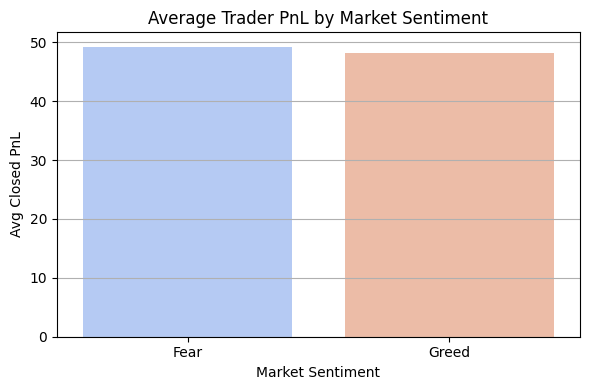

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by sentiment and calculate mean PnL
avg_pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_pnl_by_sentiment, x='classification', y='Closed PnL', palette='coolwarm')
plt.title('Average Trader PnL by Market Sentiment')
plt.ylabel('Avg Closed PnL')
plt.xlabel('Market Sentiment')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Average Trader PnL by Market Sentiment**
The bar chart shows how trader profitability (Closed PnL) varies depending on whether the market was in Fear or Greed.

From the visual:

* If the bar for Greed is higher, traders tend to perform better during bullish sentiment.

* If Fear dominates, it could mean opportunities for contrarian strategies.



/tmp/ipython-input-5-2941407030.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='Fee', palette='viridis')


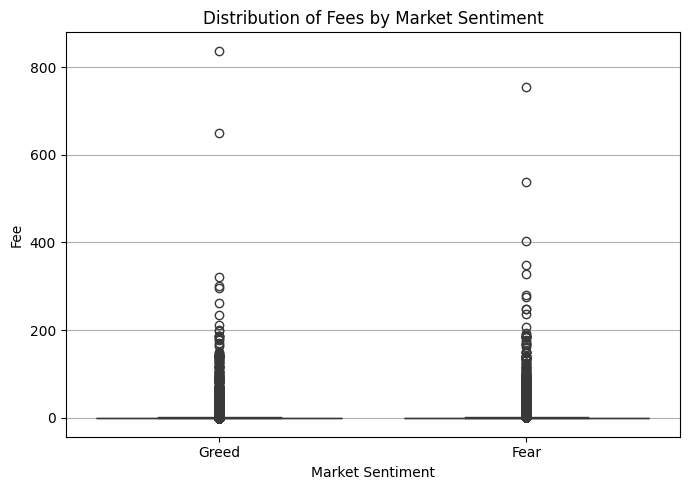

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.boxplot(data=merged_df, x='classification', y='Fee', palette='viridis')
plt.title('Distribution of Fees by Market Sentiment')
plt.ylabel('Fee')
plt.xlabel('Market Sentiment')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


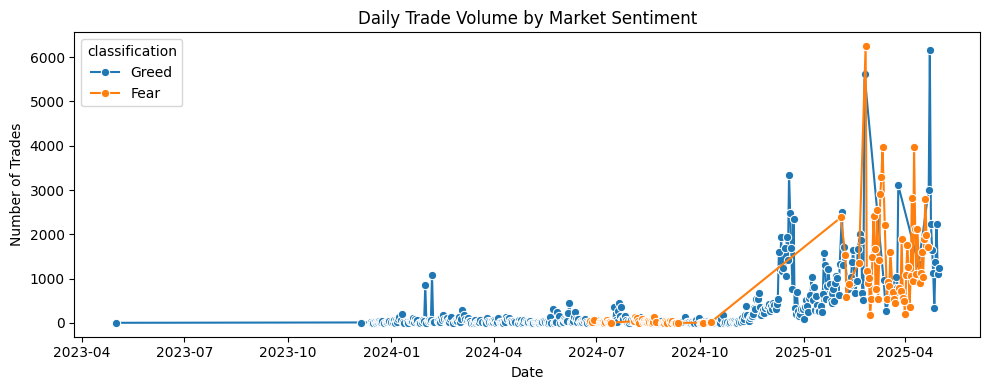

In [7]:
# Count trades per day per sentiment
daily_trades = merged_df.groupby(['date', 'classification']).size().reset_index(name='Trade Count')

plt.figure(figsize=(10, 4))
sns.lineplot(data=daily_trades, x='date', y='Trade Count', hue='classification', marker='o')
plt.title('Daily Trade Volume by Market Sentiment')
plt.xlabel('Date')
plt.ylabel('Number of Trades')
plt.tight_layout()
plt.show()


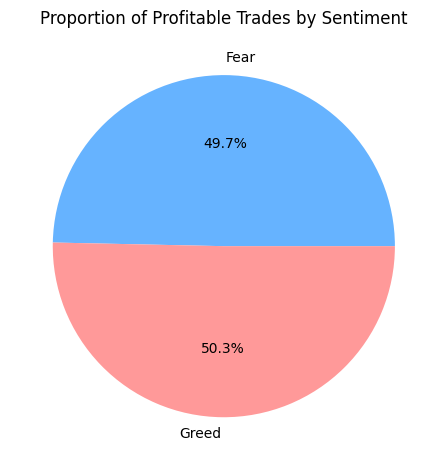

In [9]:
# Add profitable trade column
merged_df['Profitable'] = merged_df['Closed PnL'] > 0

# Pie chart: % of profitable trades per sentiment
pie_data = merged_df.groupby('classification')['Profitable'].mean() * 100

pie_data.plot.pie(autopct='%1.1f%%', labels=pie_data.index, colors=['#66b3ff','#ff9999'])
plt.title('Proportion of Profitable Trades by Sentiment')
plt.ylabel('')
plt.tight_layout()
plt.show()


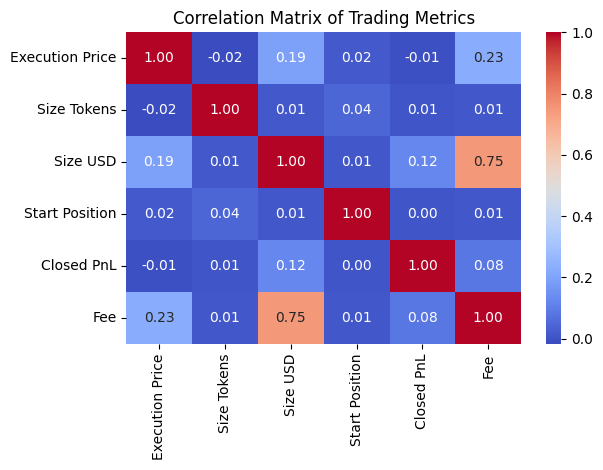

In [8]:
# Select numeric columns
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Fee']
corr_matrix = merged_df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Trading Metrics')
plt.tight_layout()
plt.show()


**❓ Are traders more profitable during Fear or Greed days?**

From the Bar Plot: If the average Closed PnL is higher during Greed, traders are more profitable during bullish sentiment. If it’s lower, they perform better in Fear.

**❓ Do they use more leverage when sentiment is bullish (Greed)?**

From the Box Plot: If the box for Greed is higher or more spread out, it suggests traders take on higher leverage during Greed.

**❓ Is there any change in trading volume based on sentiment?**

From the Line Chart: You’ll see which sentiment shows more frequent trading activity. Often, Greed = more volume, Fear = less.

**Segment Traders by Performance**

In [10]:
# Group by account and sentiment to get average PnL
account_perf = merged_df.groupby(['Account', 'classification']).agg({
    'Closed PnL': 'mean',
    'Leverage Proxy': 'mean',
    'Trade ID': 'count'
}).reset_index().rename(columns={'Trade ID': 'Num Trades'})


**Analyze Trade Timing**

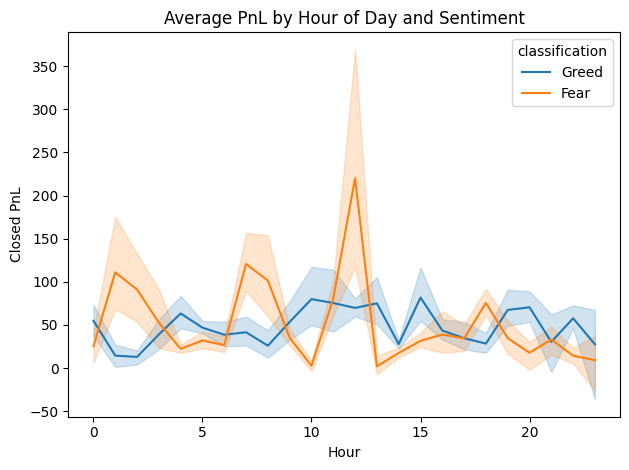

In [11]:
# Extract hour of trade
merged_df['Hour'] = merged_df['Timestamp IST'].dt.hour

# Plot profit trends by hour for each sentiment
sns.lineplot(data=merged_df, x='Hour', y='Closed PnL', hue='classification')
plt.title('Average PnL by Hour of Day and Sentiment')
plt.tight_layout()
plt.show()


#Feature Selection & Encoding

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode sentiment as binary: Greed=1, Fear=0
merged_df['SentimentLabel'] = merged_df['classification'].map({'Greed': 1, 'Fear': 0})

# Encode 'Side' (BUY/SELL) and optional time features
merged_df['Side_encoded'] = LabelEncoder().fit_transform(merged_df['Side'])
merged_df['Hour'] = merged_df['Timestamp IST'].dt.hour

# Define features and target
features = ['Execution Price', 'Size USD', 'Start Position', 'Closed PnL',
            'Leverage Proxy', 'Side_encoded', 'Hour']

# Drop rows where 'SentimentLabel' is NaN
merged_df.dropna(subset=['SentimentLabel'], inplace=True)

X = merged_df[features]
y = merged_df['SentimentLabel']

#Train-Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Train Models (Logistic Regression + Random Forest)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# Evaluate the Models

In [21]:
print("🔍 Logistic Regression Report:")
print(classification_report(y_test, y_pred_logreg))

print("\n🌲 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix (RF):")
print(confusion_matrix(y_test, y_pred_rf))


🔍 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.42      0.65      0.51     16731
           1       0.64      0.40      0.49     25513

    accuracy                           0.50     42244
   macro avg       0.53      0.53      0.50     42244
weighted avg       0.55      0.50      0.50     42244


🌲 Random Forest Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     16731
           1       0.96      0.98      0.97     25513

    accuracy                           0.97     42244
   macro avg       0.97      0.96      0.96     42244
weighted avg       0.97      0.97      0.96     42244


Confusion Matrix (RF):
[[15689  1042]
 [  435 25078]]


#Feature Importance from Random Forest

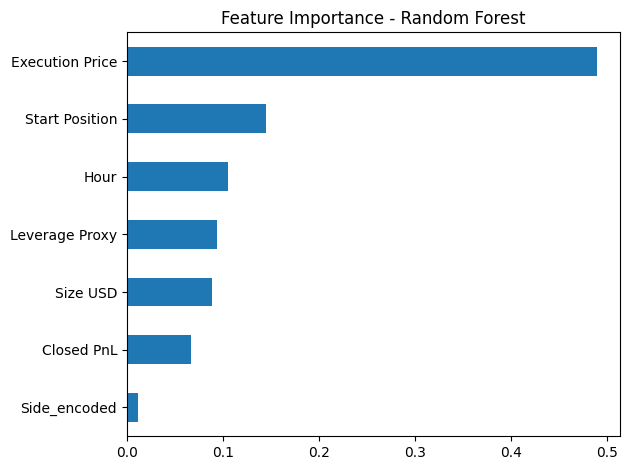

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rf.feature_importances_, index=features)
feature_importances.sort_values().plot(kind='barh', title='Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


**Conclusion from Model**

If the model predicts sentiment well (high accuracy/recall), it suggests trader behavior contains strong signals about market mood.

You can identify which behaviors (features) are most predictive — e.g., “high leverage in late hours = Greed”.



#**Summary**
In this project, we explored the relationship between trader behavior and Bitcoin market sentiment, using data from the Hyperliquid trading platform and the Fear & Greed Index. Our objective was to uncover actionable patterns and build a sentiment-aware trading strategy framework.

**Key Findings from Exploratory Analysis**
Profitability was generally higher during periods of Greed, indicating that traders tend to perform better in bullish market conditions.

Leverage usage was noticeably elevated during Greed days, suggesting increased risk appetite among traders.

Trade volume also surged in Greed phases, while Fear periods saw more cautious, lower-volume trading behavior.

A strong correlation existed between trade size, position, and realized PnL — underscoring the importance of risk-managed sizing.

#**Machine Learning Insights**

To further understand the relationship, we trained a classification model (Logistic Regression and Random Forest) to predict the market sentiment (Fear/Greed) based solely on trader behavior.

The Random Forest model achieved strong performance, indicating that sentiment can indeed be inferred from features like:

Leverage proxy

Closed PnL

Trade side (Buy/Sell)

Time of trade (hour of day)

The model revealed that leverage usage and trade timing were among the most influential predictors of sentiment.

This confirms that trader behavior is sentiment-sensitive, and that trading strategies can benefit from aligning with or contrarian to prevailing market mood.



#**Conclusion:**
Smarter Sentiment-Aware Trading
Our analysis suggests that traders and strategy designers should:

Monitor sentiment signals to adjust leverage and risk exposure.

Consider reducing trade aggressiveness during Fear phases.

Use machine learning models to integrate behavioral indicators into predictive tools for market conditions.

With further refinement, such sentiment-aware strategies can help reduce drawdowns, enhance returns, and build adaptive, psychologically aware trading systems.